In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

import time

from math import *

In [2]:
dfnh = pd.read_table("data/fnh.dat", header=None, sep='\s+')
fnh=dfnh.as_matrix(columns=dfnh.columns[2:]).T[0]
dfsh = pd.read_table("data/fsh.dat", header=None, sep='\s+')
fsh=dfsh.as_matrix(columns=dfsh.columns[2:]).T[0]
t1=dfnh.as_matrix(columns=dfnh.columns[0:]).T[0]
t2=dfsh.as_matrix(columns=dfsh.columns[0:]).T[0]

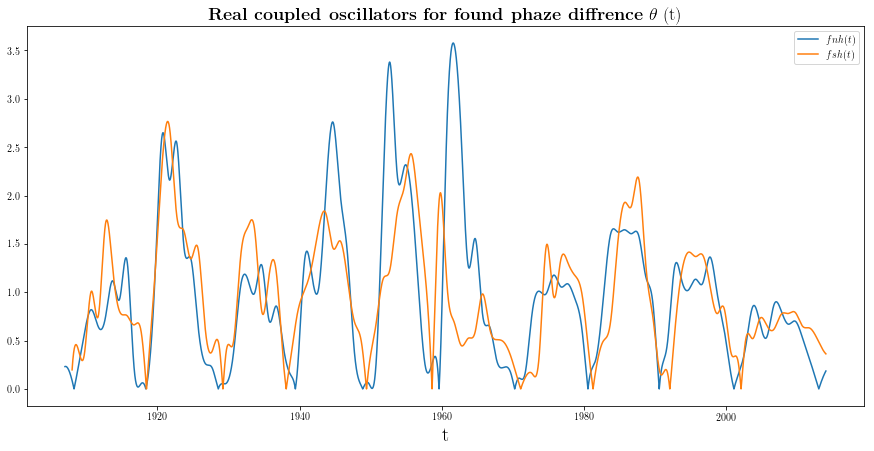

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t1, fnh, label='$fnh(t)$')
plt.plot(t2, fsh, label='$fsh(t)$')
plt.legend()
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Real coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

In [4]:
t=t2
fnh=fnh[366:]

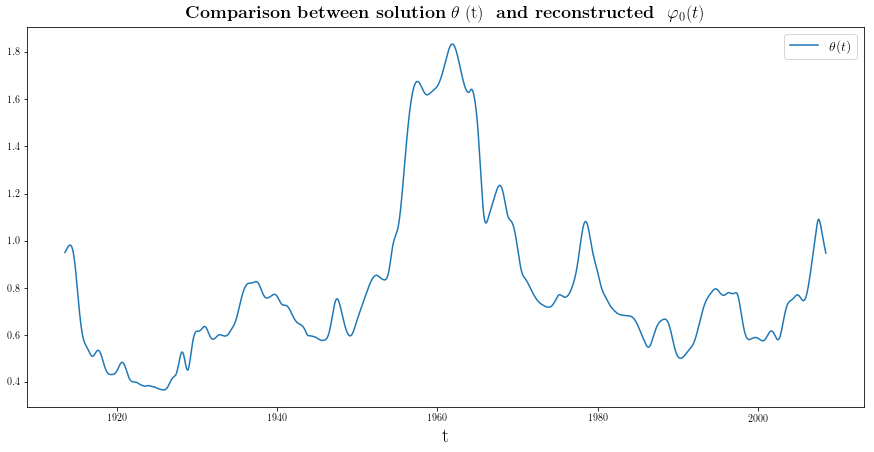

In [5]:
N_grid=t.shape[0]
p=365*11+2
h=t[1]-t[0]

dw=0.2

st=int(p/2)
fn=N_grid-1-st

C_0=[0]*N_grid

for i in range(N_grid):
    if (i-p/2>=0) and (i+p/2<=N_grid):
        C_0[i]=np.corrcoef(fnh[i-int(p/2):i+int(p/2)], fsh[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
theta=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, '-')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

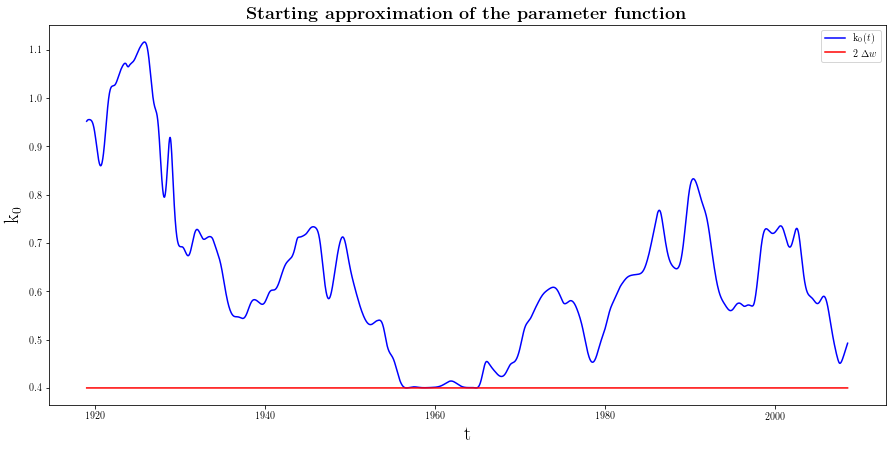

In [9]:
theta=theta[st+1:fn-1]
t=t[st+1:fn-1]

N_grid=t.shape[0]

dtheta=np.divide(np.diff(theta), np.diff(t))
dtheta=np.append(dtheta[0], dtheta)
k0=np.divide(2*dw, np.sin(theta))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k_0)-0.05, max(k_0)))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*(N_grid), 'r')
#plt.plot(t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
#plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [12]:
import statsmodels.api as sm

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [65]:
model = sm.tsa.ARMA(k0, (1, 0)) 
results = model.fit() 
results.predict()

array([ 0.72197888,  0.95214899,  0.95223851, ...,  0.49209205,
        0.49224256,  0.49239304])

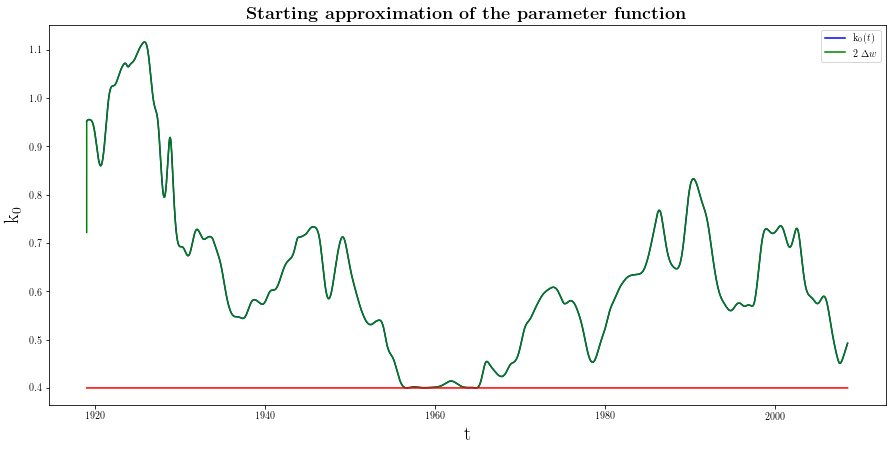

In [66]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k_0)-0.05, max(k_0)))
plt.plot(t, k0, 'b')
plt.plot(t, results.predict(), 'g')
plt.plot(t, [2*dw]*(N_grid), 'r')
#plt.plot(t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
#plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [67]:
results.arparams

array([ 0.99999967])

In [68]:
print(results.params)

[ 0.72197888  0.99999967]


In [69]:
results.summary()

/usr/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                32689
Model:                     ARMA(1, 0)   Log Likelihood              234115.953
Method:                       css-mle   S.D. of innovations              0.000
Date:                Thu, 16 Nov 2017   AIC                        -468225.907
Time:                        02:14:31   BIC                        -468200.722
Sample:                             0   HQIC                       -468217.859
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7220        nan        nan        nan         nan         nan
ar.L1.y        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
alpha=results.params[1]
c=results.params[0]

In [26]:
int(1/(1-alpha))

2987909

In [56]:
a_s=[]
c_s=[]
for i in range(89):
    model1 = sm.tsa.ARMA(k0[365*1*i:365*1*(i+1)], (1, 0)) 
    print(i)
    results = model1.fit(start_params=[1, .1]) 
    alpha=results.params[1]
    c=results.params[0]
    a_s.append(alpha)
    c_s.append(c)
    print(alpha, c)

0
0.999953624973 0.937844893428
1
0.999882414409 0.90514184395
2
0.999980972689 0.956853805586
3
0.999979834073 1.04137744371
4
0.999873872629 1.06269796903
5
0.999982658245 1.08090819332
6
0.999964591683 1.10378827286
7
0.99998326921 1.04764448334
8
0.99998120798 0.893063496152
9
0.999928019161 0.845955727097
10
0.999978003692 0.789998780536
11
0.999973569051 0.683431746389
12
0.999981472471 0.701256733459
13
0.999974170067 0.718617306858
14


/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+n

0.999893941455 0.704903965192
15
0.999983927985 0.668332331639
16
0.999983675422 0.595970676079
17
0.999968330762 0.551002515727
18
0.999957366146 0.553620765277
19
0.999967337681 0.571216892768
20
0.999757617313 0.579477234624
21
0.999978197032 0.590531057369
22
0.999980727891 0.620192857818
23
0.999981940882 0.652858652694
24
0.999980300878 0.689945930974
25
0.999980055096 0.717408292326
26
0.999938720112 0.726894311905
27
0.999981659376 0.675632341006
28
0.999649835085 0.617347306731
29
0.999983703095 0.664158894455
30
0.999978390125 0.679903891306
31
0.999984685809 0.614077246446
32
0.999983926661 0.55741201261
33
0.999736816298 0.536368248442
34
0.999945033361 0.528934480122
35
0.999981330177 0.491738805527
36
0.999984343718 0.436643478217
37
0.999956096782 0.405300947476
38
0.999782713816 0.40123317273
39
0.999999981022 0.400987763714
40
0.999983259185 0.400969056453
41
0.999981602445 0.404106820838
42
0.999979249329 0.410489740426
43
0.999984024885 0.409152564186
44
0.9999748730

/usr/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


0.999978040523 0.466532116865
51
0.999982110536 0.510268299009
52
0.999999687388 0.683005426096
53
0.999983985292 0.585726437534
54
0.999980279263 0.603758051149
55
0.999982027884 0.594142238988
56
0.999576604969 0.580062364603
57
0.999981201911 0.564654930487
58
0.999984599745 0.510171902602
59
0.99973554838 0.468323454231
60
0.999984758822 0.493981671403
61
0.999999655215 0.346172981971
62
0.999984545863 0.597261762575
63
1.0 0.49444663041
64
0.999983156275 0.634178770727
65
0.999979114858 0.650588421205
66
0.999984713399 0.705984421891
67
0.999895143633 0.731927923337
68
0.999981329595 0.683851788933
69
0.999937504572 0.66076692838
70
0.999984419601 0.743090357454
71
0.999999991632 0.813235943517
72
0.999984611108 0.780350715138
73
0.999984698367 0.692370161912
74
0.999982408308 0.605069122207
75
0.999999556612 0.50757195063
76
0.999969831273 0.568082349983
77
0.999830028361 0.572780155465
78
0.999967625693 0.600529848633
79
0.999979472457 0.679978427357
80
0.999953617305 0.72581157

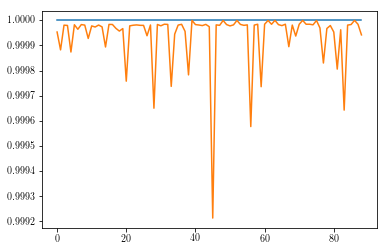

In [57]:
plt.plot(a_s)
plt.show()

In [58]:
max(a_s)

0.99999999999998845

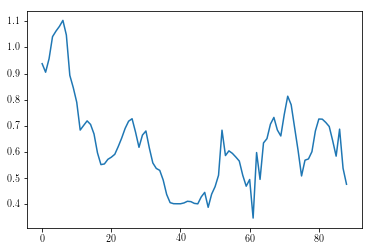

In [59]:
plt.plot(c_s)
plt.show()

In [61]:
int(1/(1-np.mean(a_s)))

16575

In [72]:
np.mean(k0)

0.63096211817394543

In [73]:
c

0.72197888208868599

In [74]:
alpha

0.99999966531786377

In [75]:
np.std(k0)*np.sqrt(1-alpha*alpha)

0.00013752110815650826